In [94]:
from sklearn.datasets import fetch_mldata
import numpy as np

In [95]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [96]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [97]:
X, y = mnist["data"], mnist["target"]

In [98]:
X.shape

(70000, 784)

In [99]:
y.shape

(70000,)

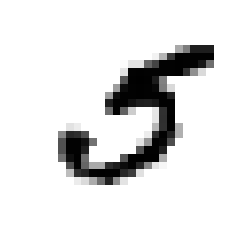

In [100]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [101]:
y[36000]

5

In [102]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [103]:
shuffle_index = np.random.permutation(60000)

In [104]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [105]:
## creating a binary (0 or 1) classifier for the number five

In [106]:
y_train_5 = (y_train == 5) # y is true for all 5s, false for all other digits
y_test_5 = (y_test == 5)

In [107]:
from sklearn.linear_model import SGDClassifier

In [108]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [109]:
>>> sgd_clf.predict([some_digit])

array([False])

In [110]:
## implementing cross validation

In [111]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

array([0.9619 , 0.96775, 0.96775])

In [112]:
from sklearn.base import BaseEstimator

In [113]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [114]:
never_5_clf = Never5Classifier()

In [115]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9095 , 0.9084 , 0.91105])

In [116]:
from sklearn.model_selection import cross_val_predict

In [117]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
confusion_matrix(y_train_5, y_train_pred)

array([[53769,   810],
       [ 1242,  4179]], dtype=int64)

In [120]:
from sklearn.metrics import precision_score, recall_score

In [121]:
precision_score(y_train_5, y_train_pred) #4204 / (4204 + 2391)

0.8376428141912207

In [122]:
recall_score(y_train_5, y_train_pred) # 4204 / (4204 + 1217)

0.770890979524073

In [123]:
from sklearn.metrics import f1_score

In [124]:
f1_score(y_train_5, y_train_pred)

0.8028818443804033

In [125]:
>>> y_scores = sgd_clf.decision_function([some_digit])

In [126]:
>>> y_scores

array([-113390.16536687])

In [127]:
threshold = 0

In [128]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [129]:
threshold = 200000

In [130]:
y_some_digit_pred = (y_scores > threshold)

In [131]:
y_some_digit_pred

array([False])

In [132]:
## raising a threshold decreases recall.

In [133]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

In [134]:
from sklearn.metrics import precision_recall_curve

In [135]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [136]:
## plot precision and recall curves

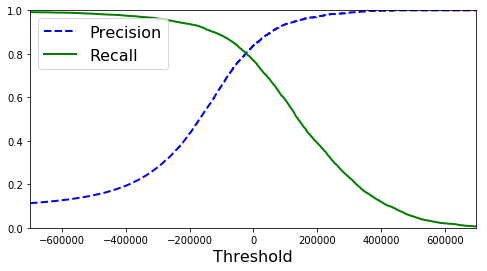

In [137]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [138]:
y_train_pred_90 = (y_scores > 70000)

In [139]:
precision_score(y_train_5, y_train_pred_90)

0.913891779396462

In [140]:
recall_score(y_train_5, y_train_pred_90)

0.6480354178195905

In [141]:
from sklearn.metrics import roc_curve

In [142]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [143]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

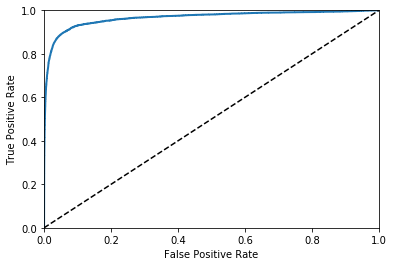

In [144]:
plot_roc_curve(fpr, tpr)
plt.show()

In [145]:
>>> from sklearn.metrics import roc_auc_score
>>> roc_auc_score(y_train_5, y_scores)

0.9659627096660156

In [146]:
### random forest classifier

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method = "predict_proba")

C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [149]:
## to plot ROC curve we need scores, not probabilities.

In [150]:
y_scores_forest = y_probas_forest[:, 1] #score = proba of positive class

In [151]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

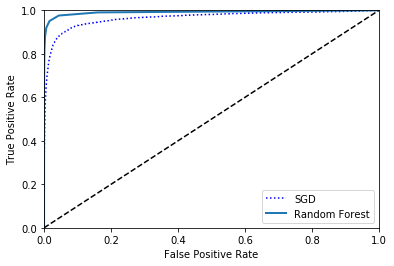

In [152]:
# plotting the SGD and Random forest methods against one another. 
# The random forest for this method is significantly stronger in performance.
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [153]:
roc_auc_score(y_train_5, y_scores_forest)

0.9915388205779363

In [154]:
### Multiclass classification versus binary classification

In [155]:
sgd_clf.fit(X_train, y_train) #y_train, not y_train_5

C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [156]:
>>> sgd_clf.predict([some_digit])

array([0], dtype=int8)

In [157]:
#return all score values

In [158]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [159]:
>>> some_digit_scores

array([[   3153.44411231, -419822.87480827, -388272.29853439,
        -126607.06111131, -509076.49295447, -113390.16536687,
        -809843.06482319, -340138.87780831, -523118.55022666,
        -722901.52455918]])

In [160]:
>>> np.argmax(some_digit_scores)

0

In [161]:
>>> sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [162]:
sgd_clf.classes_[5]

5

In [163]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [164]:
len(ovo_clf.estimators_)

45

In [165]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5], dtype=int8)

In [166]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0. , 0. , 0.7, 0. , 0.2, 0. , 0. ]])

In [167]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

array([0.85627874, 0.86134307, 0.88123218])

In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

array([0.90916817, 0.90789539, 0.91138671])

In [169]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

array([[5735,    2,   19,   10,   11,   38,   54,    8,   40,    6],
       [   1, 6475,   48,   22,    6,   44,    9,   12,  114,   11],
       [  55,   31, 5324,   98,   80,   20,   95,   55,  184,   16],
       [  53,   43,  127, 5319,    3,  256,   37,   55,  146,   92],
       [  20,   26,   35,   10, 5388,   11,   52,   27,   85,  188],
       [  69,   41,   28,  187,   80, 4576,  121,   31,  195,   93],
       [  30,   21,   45,    2,   43,   88, 5631,    5,   52,    1],
       [  24,   19,   70,   28,   56,   10,    6, 5832,   15,  205],
       [  49,  149,   65,  152,   14,  145,   57,   27, 5070,  123],
       [  43,   33,   27,   85,  183,   37,    2,  233,   87, 5219]],
      dtype=int64)

In [170]:
## lots of numbers for a confusion matrix. Let's look at an image representation

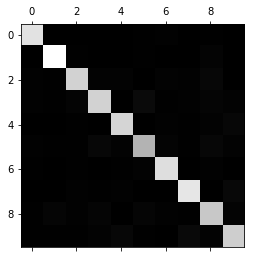

In [171]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [172]:
## most images are on the main diagonal, so they were classified correctly.

In [173]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

In [174]:
norm_conf_mx = conf_mx / row_sums
norm_conf_mx

array([[9.68259328e-01, 3.37666723e-04, 3.20783387e-03, 1.68833361e-03,
        1.85716698e-03, 6.41566774e-03, 9.11700152e-03, 1.35066689e-03,
        6.75333446e-03, 1.01300017e-03],
       [1.48323939e-04, 9.60397508e-01, 7.11954910e-03, 3.26312667e-03,
        8.89943637e-04, 6.52625334e-03, 1.33491546e-03, 1.77988727e-03,
        1.69089291e-02, 1.63156333e-03],
       [9.23128567e-03, 5.20308828e-03, 8.93588453e-01, 1.64484726e-02,
        1.34273246e-02, 3.35683115e-03, 1.59449480e-02, 9.23128567e-03,
        3.08828466e-02, 2.68546492e-03],
       [8.64459305e-03, 7.01353776e-03, 2.07144022e-02, 8.67558310e-01,
        4.89316588e-04, 4.17550155e-02, 6.03490458e-03, 8.97080411e-03,
        2.38134073e-02, 1.50057087e-02],
       [3.42348511e-03, 4.45053064e-03, 5.99109894e-03, 1.71174255e-03,
        9.22286888e-01, 1.88291681e-03, 8.90106128e-03, 4.62170490e-03,
        1.45498117e-02, 3.21807600e-02],
       [1.27282789e-02, 7.56318023e-03, 5.16509869e-03, 3.44954805e-02,
   

In [175]:
np.fill_diagonal(norm_conf_mx, 0) # fill diagonal with zeros

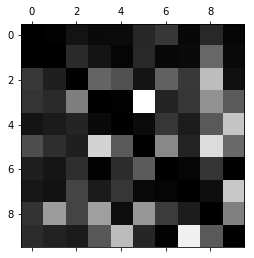

In [176]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [177]:
cl_a, cl_b = 3, 5

In [178]:
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

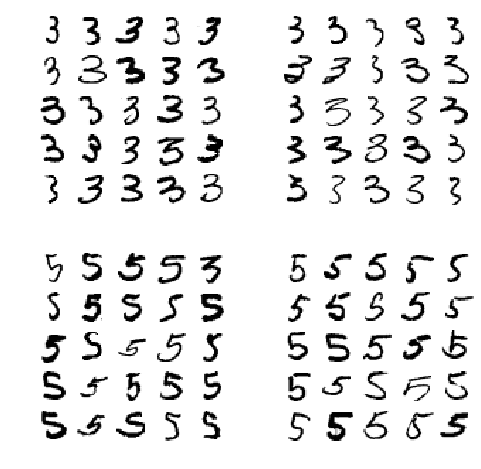

In [179]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [180]:
## multilabel classification

In [181]:
from sklearn.neighbors import KNeighborsClassifier

In [182]:
y_train_large = (y_train >= 7)  #class for large images
y_train_odd = (y_train % 2 == 1)# class for odd or even images
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [183]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [184]:
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
#f1_score(y_multilabel, y_train_knn_pred, average="macro")
#f1_score

# not optimized

In [185]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [187]:
knn_clf.fit(X_train_mod, y_train_mod)
some_index = 5500
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

NameError: name 'plot_digit' is not defined